# 1. Import Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import plotly.express as px
from termcolor import colored
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

In [2]:
# Ntuple locations
files = ['sigDDst', 'normDDst','bkgDststp_tau', 'bkgDstst0_tau','bkgDstst0_ell']

total = []
for file_name in tqdm(files, desc=colored('Loading parquets', 'blue')):
    filename=f'../Samples/Signal_MC14ri/MC14ri_{file_name}_bengal_e_2/{file_name}_bengal_e_2_0.parquet'
    data = pd.read_parquet(filename, engine="pyarrow")
    total.append(data)
    del data
df = pd.concat(total,ignore_index=True).reset_index(drop=True)
df.eval('p_D_l_lab2 = e_p * D_p', inplace=True)
df.eval('p_D_l_cms2 = e_CMS_p * D_CMS_p', inplace=True)

Loading parquets:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
import lightgbm as lgb
# load model to predict
training_variables = util.training_variables
variables = util.variables
bst_lgb = lgb.Booster(model_file=f'../BDTs/LightGBM/lgbm_multiclass.txt')

pred = bst_lgb.predict(df[training_variables], num_iteration=50) #bst_lgb.best_iteration
lgb_out = pd.DataFrame(pred, columns=['signal_prob','continuum_prob','fakeD_prob','fakeB_prob'])

df_lgb = pd.concat([df, lgb_out], axis=1)
df_lgb['largest_prob'] = df_lgb[['signal_prob','continuum_prob','fakeD_prob','fakeB_prob']].max(axis=1)
del pred, df, lgb_out

cut='signal_prob==largest_prob and signal_prob>0.8'
df_cut=df_lgb.query(cut)
df_bestSelected=df_cut.loc[df_cut.groupby(['__experiment__','__run__','__event__','__production__']).B_D_ReChi2.idxmin()]
df, samples=util.get_dataframe_samples(df_bestSelected)
mpl=util.mpl(samples)
ply=util.ply(df)
for name, df in samples.items():
    print(name, len(df))

$D\tau\nu$ 80
$D^\ast\tau\nu$ 38
$D\ell\nu$ 24857
$D^\ast\ell\nu$ 16454
$D^{\ast\ast}\tau\nu$ 15
$D^{\ast\ast}\ell\nu$ 5238
bkg_fakeDTC 3412
bkg_fakeB 2033
bkg_continuum 0
bkg_others 51


In [2]:
# Ntuple locations
file_name = 'normDDst'
file_path=f'../Samples/Signal_MC14ri/MC14ri_{file_name}_foldex_e_2/{file_name}_foldex_0.parquet'
df = pd.read_parquet(file_path, engine="pyarrow")
df.eval('D_pSig = (D_mcP - D_p)/D_pErr', inplace=True)
df.eval('e_pSig = (e_mcP - e_p)/e_pErr', inplace=True)
df.eval('B0_pSig = (B0_mcP - B0_p)/B0_pErr', inplace=True)
df.eval('D_phiSig = (D_mcPhi - D_phi)/D_phiErr', inplace=True)
df.eval('e_phiSig = (e_mcPhi - e_phi)/e_phiErr', inplace=True)
df.eval('B0_phiSig = (B0_mcPhi - B0_phi)/B0_phiErr', inplace=True)

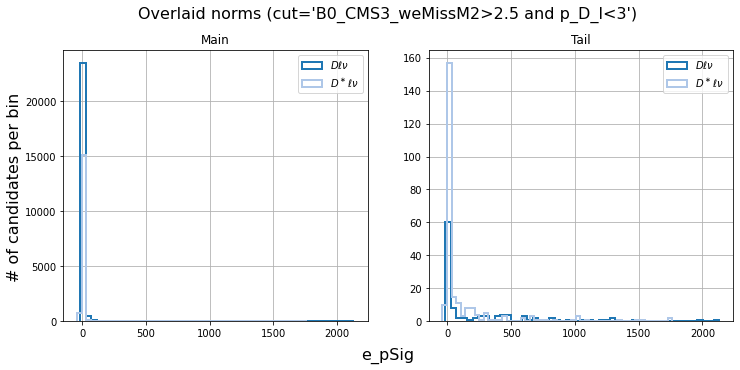

In [10]:
mpl.plot_norms_overlaid(variable='e_pSig',cut='B0_CMS3_weMissM2>2.5 and p_D_l<3')

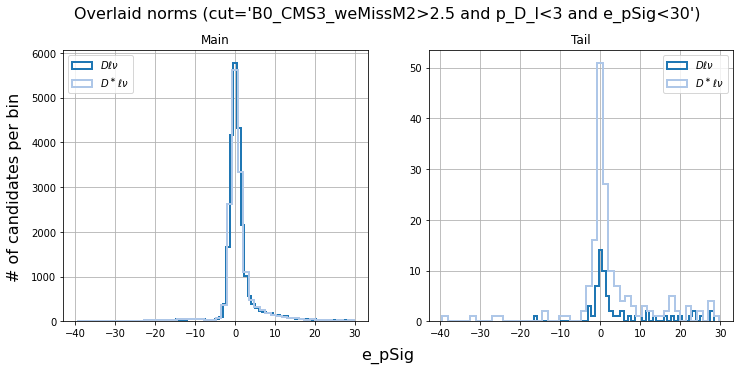

In [28]:
mpl.plot_norms_overlaid(variable='e_pSig',cut='B0_CMS3_weMissM2>2.5 and p_D_l<3 and e_pSig<30')

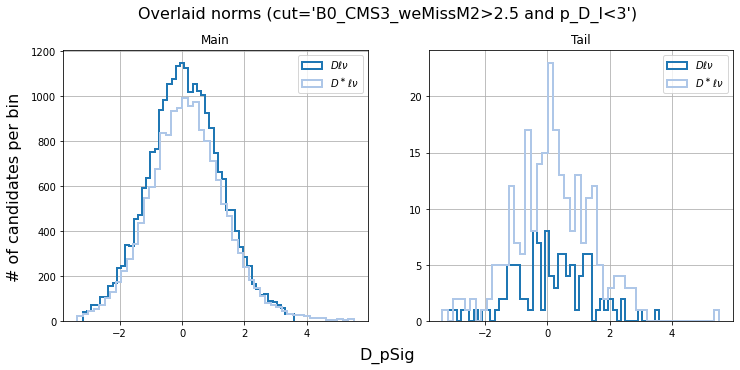

In [26]:
mpl.plot_norms_overlaid(variable='D_pSig',cut='B0_CMS3_weMissM2>2.5 and p_D_l<3')

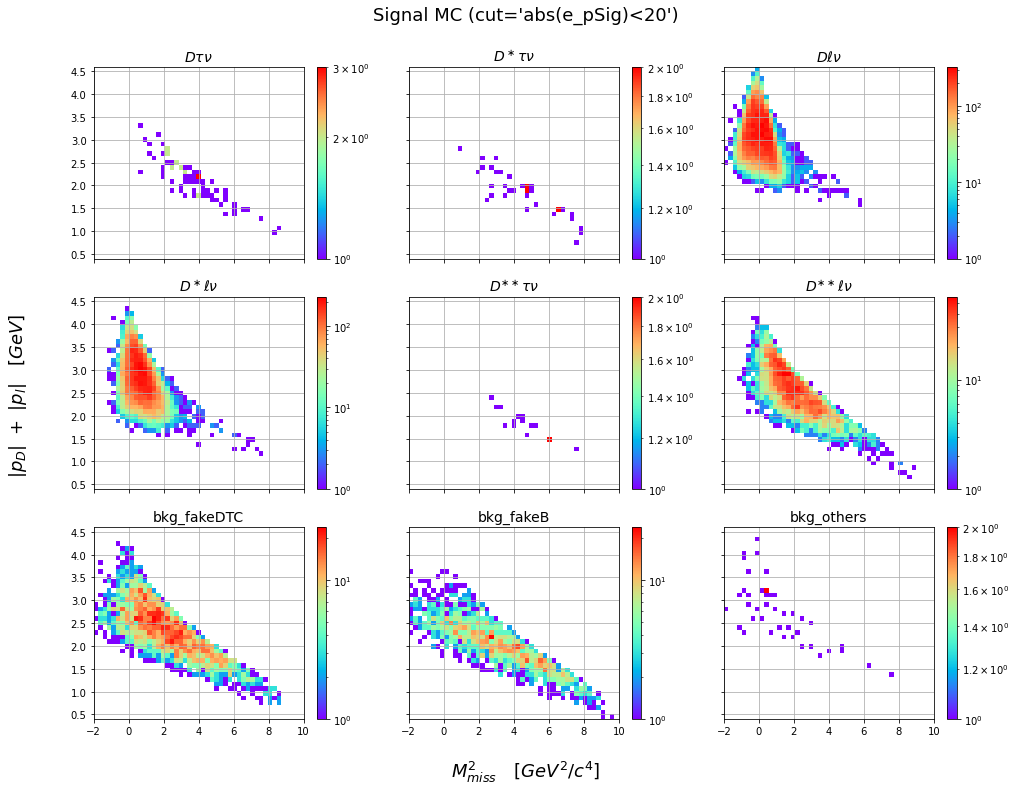

In [28]:
mpl.plot_hist_2d(cut='abs(e_pSig)<20', mask=False)

In [15]:
for name, df in samples.items():
    a = len(df)
    b = len(df.query('p_D_l>2 and B0_CMS3_weMissM2<2'))
    eff = 0 if a==0 else b/a
    print(name, a, b, eff)

$D\tau\nu$ 81176 17499 0.21556864097762884
$D^\ast\tau\nu$ 50591 5731 0.11328101836294993
$D\ell\nu$ 175488 173564 0.9890362873814734
$D^\ast\ell\nu$ 133363 123899 0.9290357895368281
$D^{\ast\ast}\tau\nu$ 139223 8812 0.06329413961773557
$D^{\ast\ast}\ell\nu$ 101554 53789 0.5296590976229395
bkg_fakeDTC 1970536 686745 0.3485067007149324
bkg_fakeB 307476 67443 0.21934394879600358
bkg_continuum 0 0 0
bkg_others 2254 899 0.39884649511978704


# 2. Plot

In [ ]:
util.plot_correlation('B0_roeMbc_my_mask>5',target='B0_CMS3_weMissM2')

In [ ]:
util.plot_correlation('B0_roeMbc_my_mask>5',target='p_D_l')

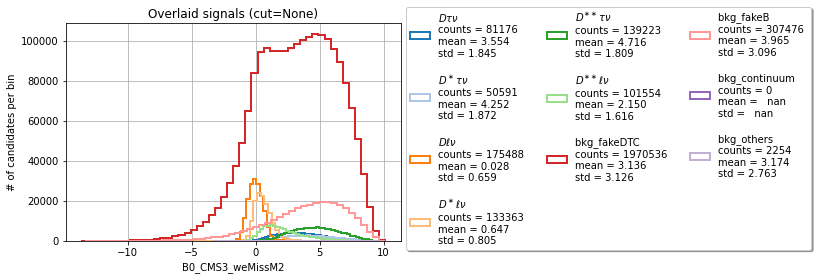

In [6]:
mpl.plot_all_overlaid(variable='B0_CMS3_weMissM2')

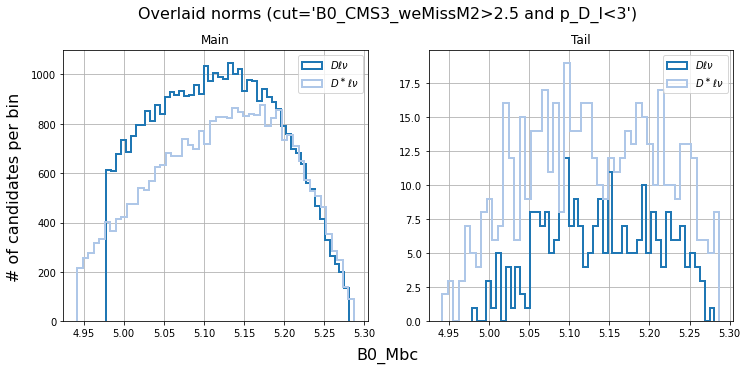

In [23]:
mpl.plot_norms_overlaid(variable='B0_Mbc',cut='B0_CMS3_weMissM2>2.5 and p_D_l<3')

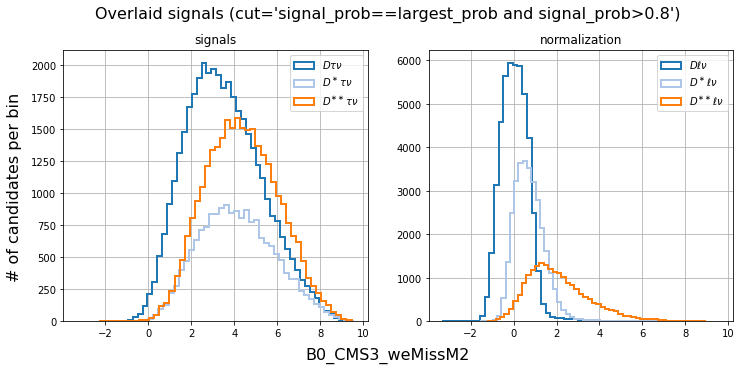

In [10]:
mpl.plot_signals_overlaid(variable='B0_CMS3_weMissM2',cut='signal_prob==largest_prob and signal_prob>0.8')

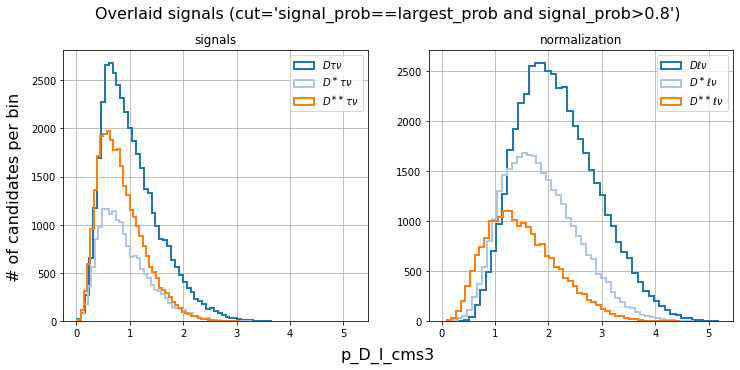

In [11]:
mpl.plot_signals_overlaid(variable='p_D_l_cms3',cut='signal_prob==largest_prob and signal_prob>0.8')

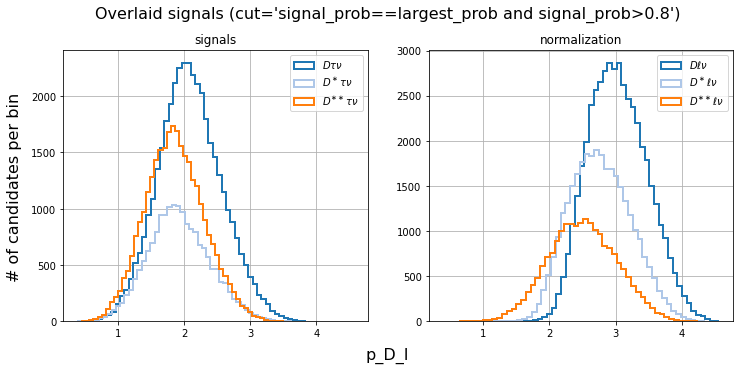

In [5]:
mpl.plot_signals_overlaid(variable='p_D_l',cut='signal_prob==largest_prob and signal_prob>0.8')

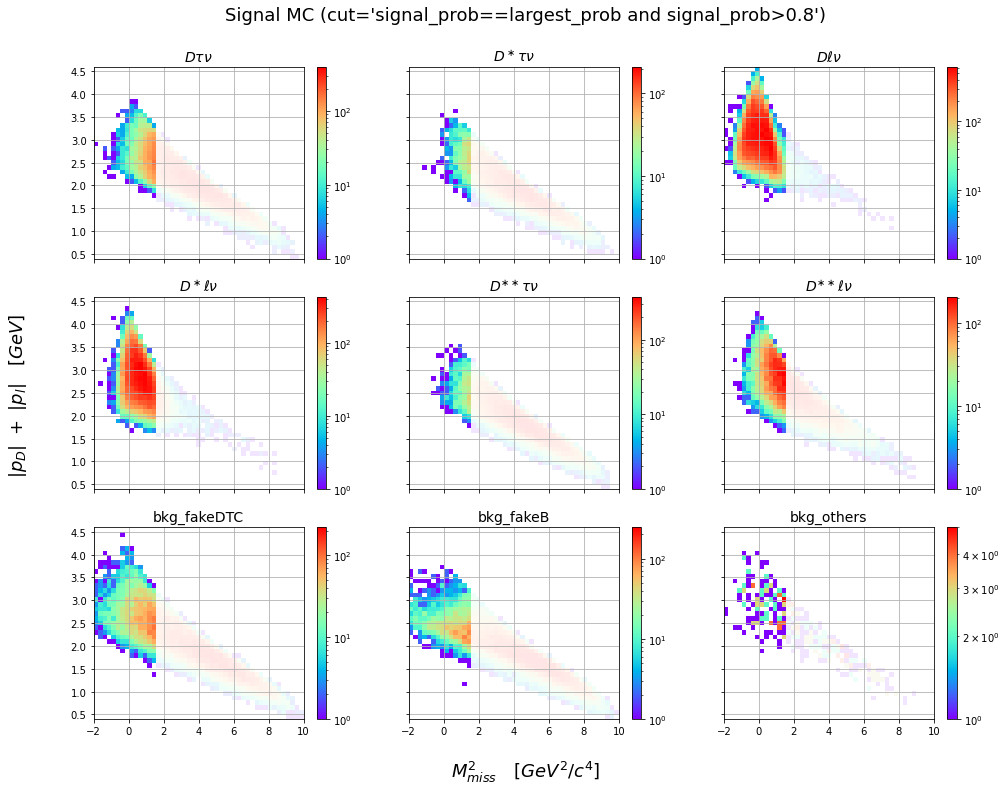

In [24]:
mpl.plot_hist_2d(cut='signal_prob==largest_prob and signal_prob>0.8', mask=[1.6,1,0.1])

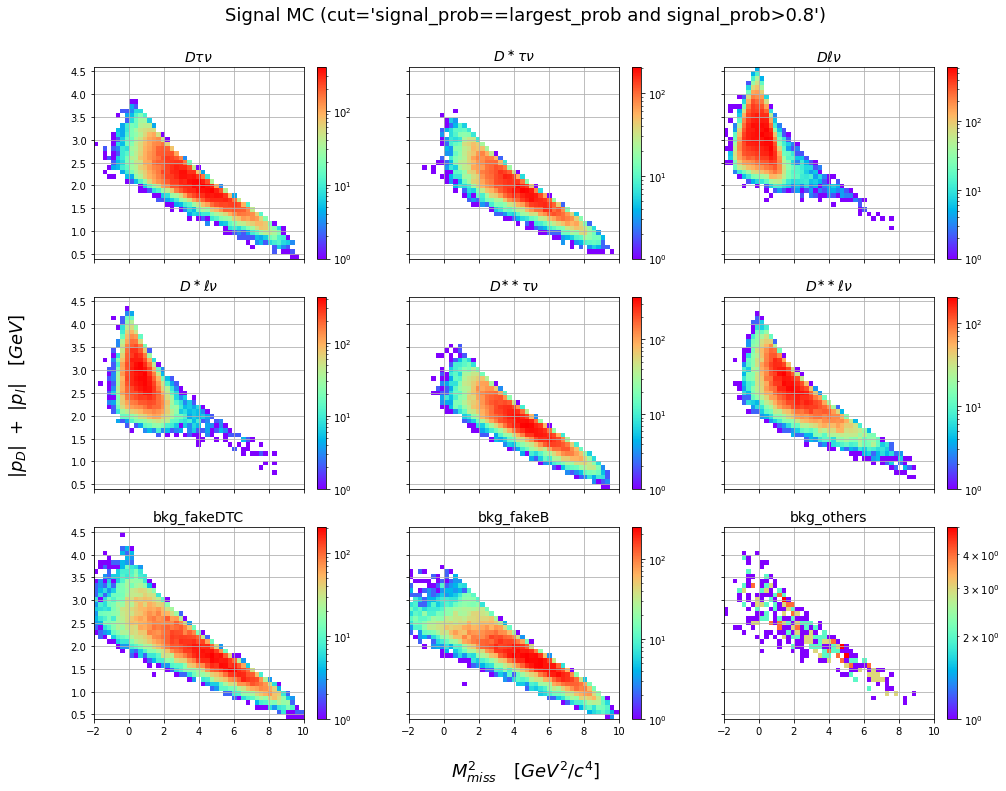

In [10]:
mpl.plot_hist_2d(cut='signal_prob==largest_prob and signal_prob>0.8', mask=False)

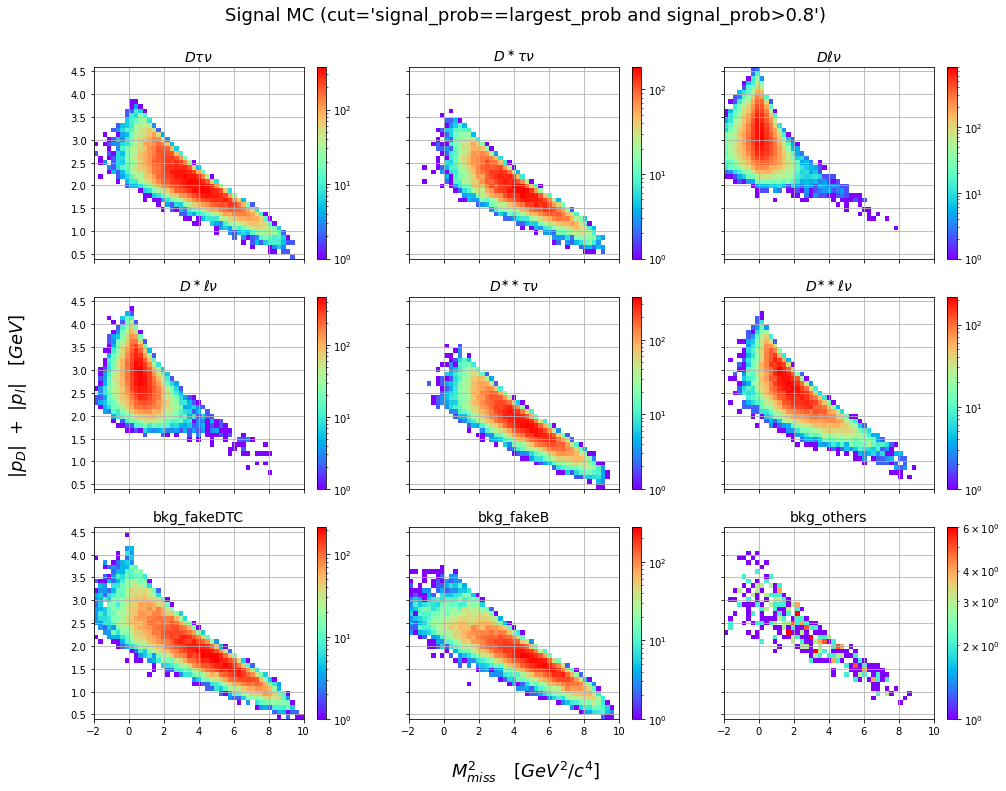

In [8]:
mpl.plot_hist_2d(variables=['B0_CMS4_weMissM2','p_D_l'], cut='signal_prob==largest_prob and signal_prob>0.8')

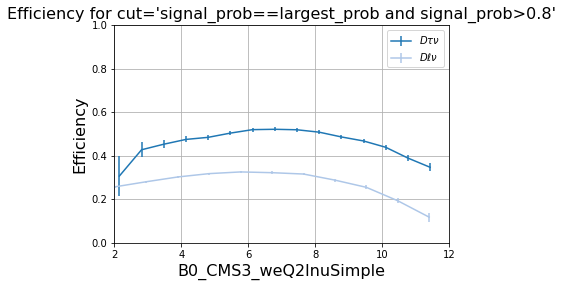

In [11]:
mpl.plot_cut_efficiency(cut='signal_prob==largest_prob and signal_prob>0.8', variable='B0_CMS3_weQ2lnuSimple')

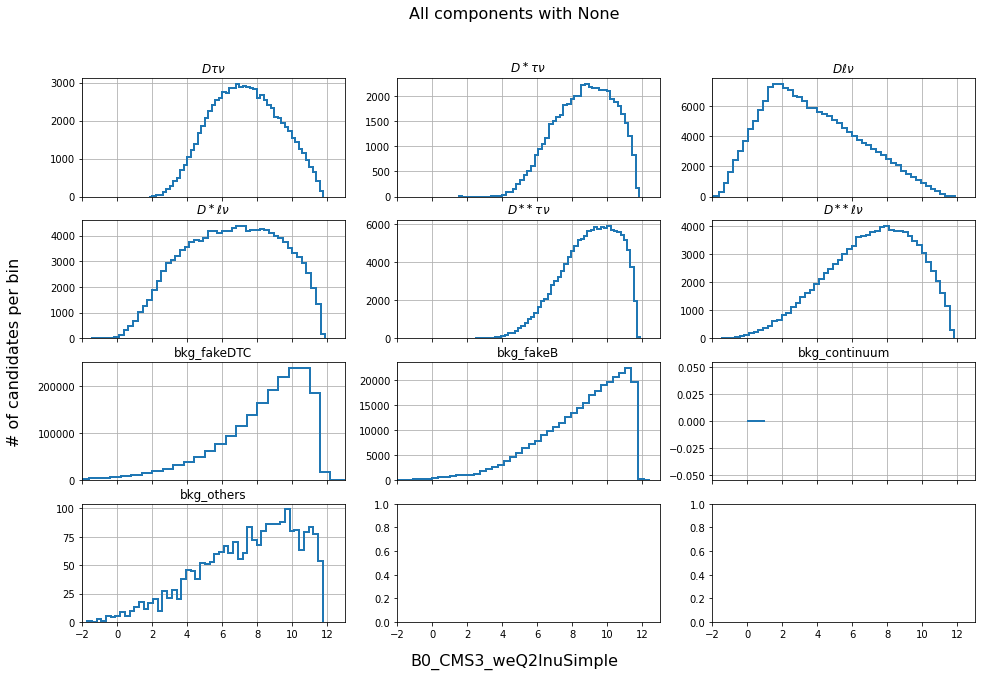

In [13]:
mpl.plot_all_separately(variable='B0_CMS3_weQ2lnuSimple',xlim=[-2,13])

In [29]:
plyex.plot_cut_efficiency(cut='signal_prob==largest_prob and signal_prob>0.8', variable='B0_CMS3_weQ2lnuSimple')